In [1]:
# coding:utf-8

# 引入需要的包

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')


import warnings

def ignore_warn(*args ,**kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
# 读取数据

train = pd.read_csv('../data/d_train_20180102.csv',encoding='gbk')
test = pd.read_csv('../data/d_test_A_20180102.csv',encoding='gbk')

print('train shape',train.shape)
print('test shape',test.shape)

train_ID = train['id']
test_ID = test['id']



print('train feature shape',train.shape)
print('test feature shape',test.shape)

train shape (5642, 42)
test shape (1000, 41)
train feature shape (5642, 42)
test feature shape (1000, 41)


In [3]:
# 查看数据
print(train.head())
print(test.head())

   id 性别  年龄        体检日期  *天门冬氨酸氨基转换酶  *丙氨酸氨基转换酶  *碱性磷酸酶  *r-谷氨酰基转换酶   *总蛋白  \
0   1  男  41  12/10/2017       24.960     23.100  99.590      20.230 76.880   
1   2  男  41  19/10/2017       24.570     36.250  67.210      79.000 79.430   
2   3  男  46  26/10/2017       20.820     15.230  63.690      38.170 86.230   
3   4  女  22  25/10/2017       14.990     10.590  74.080      20.220 70.980   
4   5  女  48  26/10/2017       20.070     14.780  75.790      22.720 78.050   

     白蛋白  ...    血小板计数  血小板平均体积  血小板体积分布宽度  血小板比积  中性粒细胞%  淋巴细胞%  单核细胞%  \
0 49.600  ...  166.000    9.900     17.400  0.164  54.100 34.200  6.500   
1 47.760  ...  277.000    9.200     10.300  0.260  52.000 36.700  5.800   
2 48.000  ...  241.000    8.300     16.600  0.199  48.100 40.300  7.700   
3 44.020  ...  252.000   10.300     10.800  0.260  41.700 46.500  6.700   
4 41.830  ...  316.000   11.100     14.000  0.350  56.600 33.100  9.100   

   嗜酸细胞%  嗜碱细胞%    血糖  
0  4.700  0.600 6.060  
1  4.700  0.800 5.390  
2 

In [8]:
# 查看特征列
print(train.columns)


data = pd.concat([train,test],axis=0)
print(data.isnull().sum()/len(data))

Index(['id', '性别', '年龄', '体检日期', '*天门冬氨酸氨基转换酶', '*丙氨酸氨基转换酶', '*碱性磷酸酶',
       '*r-谷氨酰基转换酶', '*总蛋白', '白蛋白', '*球蛋白', '白球比例', '甘油三酯', '总胆固醇',
       '高密度脂蛋白胆固醇', '低密度脂蛋白胆固醇', '尿素', '肌酐', '尿酸', '乙肝表面抗原', '乙肝表面抗体', '乙肝e抗原',
       '乙肝e抗体', '乙肝核心抗体', '白细胞计数', '红细胞计数', '血红蛋白', '红细胞压积', '红细胞平均体积',
       '红细胞平均血红蛋白量', '红细胞平均血红蛋白浓度', '红细胞体积分布宽度', '血小板计数', '血小板平均体积',
       '血小板体积分布宽度', '血小板比积', '中性粒细胞%', '淋巴细胞%', '单核细胞%', '嗜酸细胞%', '嗜碱细胞%',
       '血糖'],
      dtype='object')
*r-谷氨酰基转换酶    0.212
*丙氨酸氨基转换酶     0.212
*天门冬氨酸氨基转换酶   0.212
*总蛋白          0.212
*球蛋白          0.212
*碱性磷酸酶        0.212
id            0.000
中性粒细胞%        0.003
乙肝e抗体         0.769
乙肝e抗原         0.769
乙肝核心抗体        0.769
乙肝表面抗体        0.769
乙肝表面抗原        0.769
低密度脂蛋白胆固醇     0.210
体检日期          0.000
单核细胞%         0.003
嗜碱细胞%         0.003
嗜酸细胞%         0.003
尿素            0.237
尿酸            0.237
年龄            0.000
性别            0.000
总胆固醇          0.210
淋巴细胞%         0.003
甘油三酯          0.210
白球比例          0.212
白细胞计数    

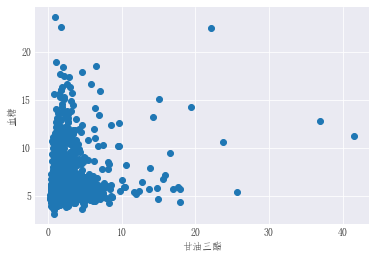

In [19]:
from pylab import mpl
from scipy.special import boxcox1p
lam = 0.15


mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
t_f = train['甘油三酯']
fig ,ax = plt.subplots()
# tmp,lambda_  = stats.boxcox(train['血糖'])
ax.scatter(x = t_f,y=train['血糖'])
plt.ylabel('血糖')
plt.xlabel('甘油三酯')


 mu = 5.63 and sigma = 1.54



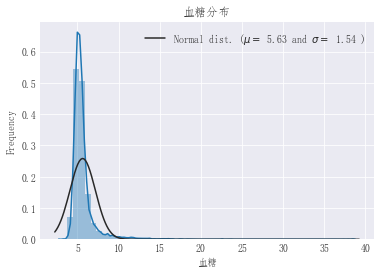

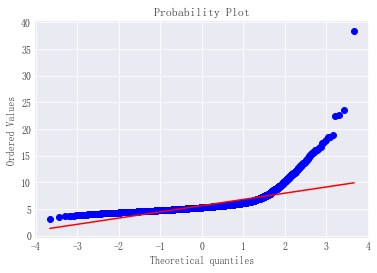

In [49]:
# 血糖 is the variable we need to predict. So let's do some analysis on this variable first.

sns.distplot(train['血糖'],fit=norm)

(mu,sigma) = norm.fit(train['血糖'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('血糖分布')

fig = plt.figure()
res = stats.probplot(train['血糖'], plot=plt)
plt.show()


 mu = 0.37 and sigma = 0.00



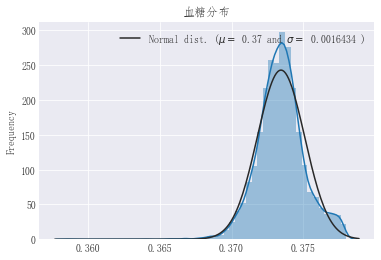

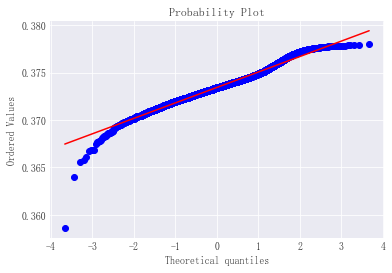

In [50]:
# 血糖 is the variable we need to predict. So let's do some analysis on this variable first.
from scipy.special import boxcox, inv_boxcox

tmp,lambda_  = stats.boxcox(train['血糖'])

# print(train['血糖'])
# print(inv_boxcox(tmp,lambda_))

sns.distplot(tmp,fit=norm)

(mu,sigma) = norm.fit(tmp)

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.7f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('血糖分布')

fig = plt.figure()
res = stats.probplot(tmp, plot=plt)
plt.show()

In [51]:
# 特征工程
# 合并训练和测试数据
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['血糖'].values
all_data = pd.concat((train,test)).reset_index(drop=True)
all_data.drop(['血糖'],axis=1,inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (6642, 41)


In [52]:
# 查看缺失值比例
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
乙肝e抗体,76.935
乙肝表面抗原,76.935
乙肝表面抗体,76.935
乙肝核心抗体,76.935
乙肝e抗原,76.935
尿酸,23.668
尿素,23.668
肌酐,23.668
*碱性磷酸酶,21.168
*球蛋白,21.168


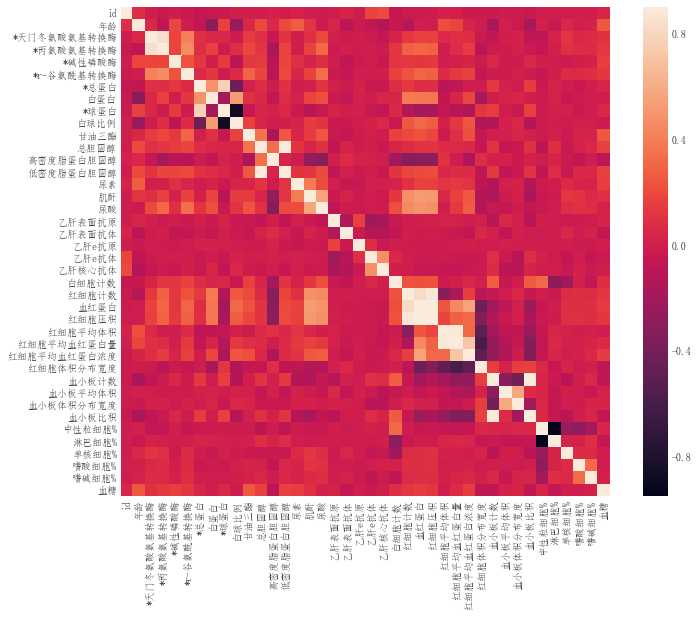

In [53]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True)

In [54]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [104]:
#Validation function
n_folds = 5
y_train,lambda_  = stats.boxcox(train['血糖'])
sex_map = {'男':1,'女':0,'??':0}

t_train = train.drop(['血糖'],axis=1)
t_train['性别'] = t_train['性别'].map(sex_map)
t_train = t_train.fillna(0)




def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= -cross_val_score(model, t_train.values, y_train, scoring="neg_mean_squared_error", cv = kf)
    
    print(rmse)
    return(rmse)

In [105]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [106]:
score = rmsle_cv(GBoost)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

[  2.29469771e-06   2.69151065e-06   2.43160293e-06   2.23463658e-06
   3.17581581e-06]
LGBM score: 0.0000 (0.0000)



In [107]:
GBoost.fit(t_train.values,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=15,
             min_samples_split=10, min_weight_fraction_leaf=0.0,
             n_estimators=3000, presort='auto', random_state=5,
             subsample=1.0, verbose=0, warm_start=False)

In [113]:
x = GBoost.predict(t_train.values)
print(x)
print(sorted(list(inv_boxcox(x,lambda_))))

[ 0.37449443  0.37363638  0.37394449 ...,  0.37388962  0.37454403
  0.37471304]
[4.1455611293750998, 4.1798501985682277, 4.1891866435447707, 4.1939156624969147, 4.2273542698143034, 4.2285033028388233, 4.2408849578228898, 4.2560000445897916, 4.2714787893880022, 4.2844888919446573, 4.2893122970609934, 4.2902550021208166, 4.293112103927057, 4.3023303389149863, 4.303192291780185, 4.308882756989755, 4.3163555165177119, 4.3186026394787413, 4.3196976291774227, 4.319831299691943, 4.3231134029824645, 4.3262039748995562, 4.3474859943629074, 4.3501745473475371, 4.3530215655791027, 4.356511190452963, 4.3614923728003356, 4.3629508845894405, 4.3647655088204864, 4.3661102475077929, 4.3666266325404104, 4.3686258684982953, 4.3694090534638859, 4.3737212258945783, 4.3806964123085583, 4.3812997767713702, 4.3901248260298891, 4.3910637637674039, 4.3912859381361491, 4.3924453907687218, 4.3962137782194182, 4.3975567725216473, 4.3990207111935362, 4.4028111579420584, 4.4042598653992444, 4.4067707580503344, 4.41

In [108]:
print(y_train)
print(inv_boxcox(y_train,lambda_))

[ 0.37479926  0.37363004  0.37403314 ...,  0.37328995  0.37519712
  0.37471343]
[ 6.06  5.39  5.59 ...,  5.24  6.37  6.  ]


In [109]:
from sklearn.metrics import mean_squared_error as mse

def mse_2(preds,train_data):
    labels = train_data.get_label()

    return 'mse_2',mse(y_true=labels ,y_pred=preds) / 2.0,False

In [110]:
print(mse(inv_boxcox(y_train,lambda_),inv_boxcox(x,lambda_))/2)

0.450518785019


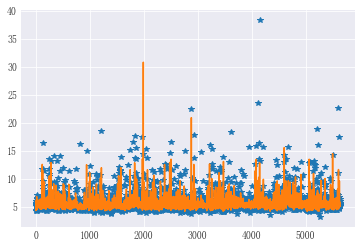

In [111]:
plt.plot(range(len(inv_boxcox(y_train,lambda_))),inv_boxcox(y_train,lambda_),'*')
plt.plot(range(len(inv_boxcox(x,lambda_))),inv_boxcox(x,lambda_),'-')
plt.show()

In [123]:
sub_test = test
print(sub_test)

       id 性别  年龄        体检日期  *天门冬氨酸氨基转换酶  *丙氨酸氨基转换酶  *碱性磷酸酶  *r-谷氨酰基转换酶  \
0    5733  男  54  10/10/2017       23.850     26.690 116.080      34.360   
1    5734  男  50  10/10/2017       29.750     34.980  90.070     111.430   
2    5735  男  27  10/10/2017          nan        nan     nan         nan   
3    5736  女  53  10/10/2017       17.980     16.630  95.950      23.410   
4    5739  女  43  10/10/2017       19.120     19.800  76.970      15.700   
5    5740  男  48  10/10/2017       25.770     17.660  92.060      26.010   
6    5741  女  49  10/10/2017       51.540     40.530  67.240      23.230   
7    5742  女  51  10/10/2017       26.510     24.770  87.710      26.600   
8    5743  女  68  10/10/2017       28.440     22.990  85.910      38.570   
9    5744  女  64  10/10/2017       35.650     29.050 114.980     202.290   
10   5745  女  27  10/10/2017       23.520     18.560  67.090      12.310   
11   5746  男  71  13/10/2017       25.160     23.370  55.890      20.080   
12   5747  男

In [125]:
del sub_test['id']
del sub_test['体检日期']
print(sub_test)
result = GBoost.predict(sub_test.values)
print(result)

     性别  年龄  *天门冬氨酸氨基转换酶  *丙氨酸氨基转换酶  *碱性磷酸酶  *r-谷氨酰基转换酶   *总蛋白    白蛋白   *球蛋白  \
0     1  54       23.850     26.690 116.080      34.360 82.750 46.030 36.720   
1     1  50       29.750     34.980  90.070     111.430 71.900 44.090 27.810   
2     1  27        0.000      0.000   0.000       0.000  0.000  0.000  0.000   
3     0  53       17.980     16.630  95.950      23.410 78.160 45.440 32.720   
4     0  43       19.120     19.800  76.970      15.700 80.760 46.900 33.860   
5     1  48       25.770     17.660  92.060      26.010 72.290 45.450 26.840   
6     0  49       51.540     40.530  67.240      23.230 74.920 45.600 29.320   
7     0  51       26.510     24.770  87.710      26.600 70.310 44.390 25.920   
8     0  68       28.440     22.990  85.910      38.570 79.670 44.540 35.130   
9     0  64       35.650     29.050 114.980     202.290 78.080 44.580 33.500   
10    0  27       23.520     18.560  67.090      12.310 78.510 43.720 34.790   
11    1  71       25.160     23.370  55.

ValueError: Number of features of the model must match the input. Model n_features is 40 and input n_features is 39 